In [1]:
#libarary
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#1. import data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [8]:
numerics = {'int64', 'float64'}
train_numbers = train.select_dtypes(include = numerics)
test_numbers = test.select_dtypes(include = numerics)

In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
train_numbers.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
test_numbers.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


# Training

# 1. Ordinary Linear Regression

In [11]:
#training 
#initialization 
reg = linear_model.LinearRegression(normalize = False)

In [12]:
#prepare independent and target 
x = train_numbers.drop(['SalePrice'],axis=1)
y = train_numbers['SalePrice']

x= x.fillna(0)

In [17]:
#put 33% of the data randomly into the testing part
#compare the y_train to y_test to confirm the accuracy of the algorith
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [18]:
#learning
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
#validation prediction MSE, test prediction 
y_test_predict = reg.predict(x_test)
mean_squared_error(y_test, y_test_predict)

1538566819.4192634

In [20]:
#train prediction
y_train_predict = reg.predict(x_train)
mean_squared_error(y_train, y_train_predict)

1079459509.7923293

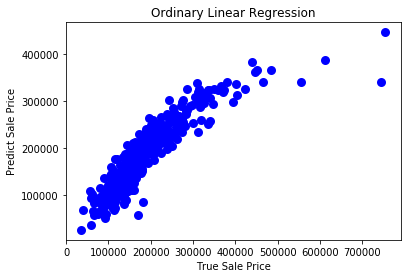

In [44]:
#plot
plt.scatter(y_test, y_test_predict, color = 'blue', linewidth = 3)
plt.xlabel("True Sale Price")
plt.ylabel("Predict Sale Price")
plt.title("Ordinary Linear Regression")
plt.show()


# Ridge Regression

In [40]:
#alpha is determine the weight it puts on complex linear lines
reg_ridge = linear_model.Ridge(alpha = 0.1)

#learning
reg_ridge.fit (x_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
x_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
615,616,85,80.0,8800,6,7,1963,1963,156.0,763,...,480,120,0,0,0,0,0,0,5,2010
613,614,20,70.0,8402,5,5,2007,2007,0.0,206,...,0,0,30,0,0,0,0,0,12,2007
1303,1304,20,73.0,8688,7,5,2005,2005,228.0,0,...,834,208,59,0,0,0,0,0,4,2006
486,487,20,79.0,10289,5,7,1965,1965,168.0,836,...,515,0,0,0,0,0,0,0,6,2007
561,562,20,77.0,10010,5,5,1974,1975,0.0,1071,...,418,240,38,0,0,0,0,0,4,2006


In [41]:
#weights for each independent variables, like Id, MssubClass, LotFootage...
#The training process is to find all the reg.coefficient. it's the slop of the linear line
#The best model is the ones that minimizes all the reg.coefficient 
reg.coef_

array([ -2.64613914e+00,  -1.86787528e+02,  -2.50219767e+01,
         4.27793629e-01,   1.81222695e+04,   3.43131753e+03,
         2.98025389e+02,   1.72208107e+02,   2.28983600e+01,
         6.76608534e+00,  -2.33395599e+00,  -1.69796786e+00,
         2.73416149e+00,   4.36353101e+00,   2.48374533e+00,
         2.39061792e+01,   3.07534556e+01,   1.17295665e+04,
        -1.42779111e+02,   5.38048088e+03,   1.72240059e+01,
        -9.91240978e+03,  -1.42252757e+04,   7.02404082e+03,
         4.94422856e+03,  -1.33428318e+01,   1.70968068e+04,
         7.41808534e+00,   2.83839443e+01,  -1.48438492e+01,
         1.64063233e+01,   4.89568601e+01,   9.16307120e+01,
        -1.54739895e+02,  -1.19764636e+00,  -3.59095308e+01,
        -1.36064601e+02])

In [58]:
#The intercection on the y_axix 
#y = coef (independent variable) + intercept, the line expression
reg.intercept_

-687299.54371674184

In [38]:
#validation prediction MSE, test prediction 
y_test_predict = reg_ridge.predict(x_test)
mean_squared_error(y_test, y_test_predict)

1538537399.9714875

In [45]:
#train prediction
y_train_predict = reg_ridge.predict(x_train)
mean_squared_error(y_train, y_train_predict)

1079459643.3705478

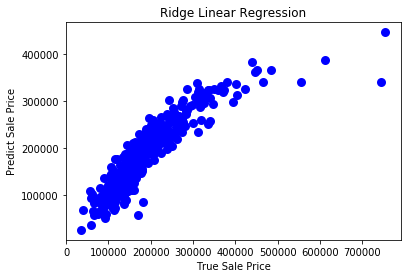

In [47]:
#plot
plt.scatter(y_test, y_test_predict, color = 'blue', linewidth = 3)
plt.xlabel("True Sale Price")
plt.ylabel("Predict Sale Price")
plt.title("Ridge Linear Regression")
plt.show()

# Lasso

In [51]:
reg_lasso = linear_model.Lasso(alpha = 0.1)

In [52]:
reg_lasso.fit (x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
#train prediction
y_train_predict = reg_lasso.predict(x_train)
mean_squared_error(y_train, y_train_predict)

1079459510.8706632

In [55]:
#validation prediction MSE, test prediction 
y_test_predict = reg_lasso.predict(x_test)
mean_squared_error(y_test, y_test_predict)

1538561715.4258707

In [60]:
reg_lasso.coef_

array([ -2.64601159e+00,  -1.86792989e+02,  -2.50237259e+01,
         4.27799131e-01,   1.81224385e+04,   3.43113872e+03,
         2.98041791e+02,   1.72223296e+02,   2.28981682e+01,
         9.12764740e+00,   2.72674223e-02,   6.63270446e-01,
         3.72748491e-01,   3.13318833e+01,   2.94533239e+01,
         5.08745297e+01,   3.78616653e+00,   1.17289218e+04,
        -1.41189716e+02,   5.37886692e+03,   1.61530787e+01,
        -9.91204914e+03,  -1.42212274e+04,   7.02360059e+03,
         4.94411879e+03,  -1.33423303e+01,   1.70959259e+04,
         7.41974175e+00,   2.83845052e+01,  -1.48426914e+01,
         1.64068518e+01,   4.89572209e+01,   9.16321717e+01,
        -1.54741713e+02,  -1.19781673e+00,  -3.59164787e+01,
        -1.35998882e+02])

In [59]:
reg_lasso.intercept_

-687495.19125333626

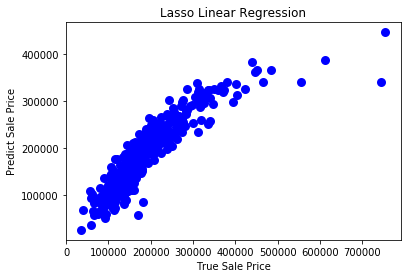

In [56]:
#plot
plt.scatter(y_test, y_test_predict, color = 'blue', linewidth = 3)
plt.xlabel("True Sale Price")
plt.ylabel("Predict Sale Price")
plt.title("Lasso Linear Regression")
plt.show()

# Submission

In [57]:
test_numbers = test_numbers.fillna(0)
test_numbers_predict = reg.predict(test_numbers)

test_numbers['SalePrice'] = test_numbers_predict
result = test_numbers[['Id','SalePrice']]
result.to_csv('submission_reg_version_0.csv', index=False)

ValueError: shapes (1459,38) and (37,) not aligned: 38 (dim 1) != 37 (dim 0)